# 1. Imports

In [27]:
# scikit-learn
from sklearn import set_config # return pd.DataFrame from transformers
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler # scale to zero mean and unit variance
from sklearn.decomposition import PCA # primary component analysis
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# others
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plots
import numpy as np
import pickle # move transformers and estimators between notebooks

# custom helper functions
from helper_functions import feature_distribution_plot, scree_plot, decision_boundary_plot

<hr>

# 2. Settings

In [28]:
# set sklearn functions to output pd.DataFrames
set_config(transform_output='pandas')

<hr>

# 3.Preprocessing

## 3.1 General Preprocessing

In [29]:
# read the data
df = pd.read_csv('./data/hcvdat33_Complete.csv')

In [30]:
# drop the index and the nominal feature 'sex'
df.drop(columns=['Unnamed: 0', 'Sex'], inplace=True)

In [31]:
# seperate features and label
X = df.drop(columns='Category')
y = df['Category']

In [32]:
# numerically encode labels whilst storing their names
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [33]:
# extract class names from laben encoder
class_names = label_encoder.classes_
class_names = [class_name.split('=')[1] for class_name in class_names]
class_names

['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']

In [34]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## 3.2 Missing Data

### 3.2.1 Inspection

In [35]:
# calculate the # of missing values per feature
X_missing = X.isnull().sum()

print("Missing Values per Feature:\n")
print(X_missing)

Missing Values per Feature:

Age      0
ALB      1
ALP     18
ALT      1
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64


### 3.2.2 Imputation

In [36]:
imputer = KNNImputer(n_neighbors=5, weights='distance') # initialize the imputer

## 3.3 Pipeline

In [37]:
# combine all transformers from preprocessing to pipeline
preprocessing = Pipeline(steps=[('imputation', imputer)])

<hr>

# 4.  Decision Tree Classifier

## 4.1 Training

In [38]:
# initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

In [39]:
# encapsulate the decision tree in a pipeline
decision_tree = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('tree', clf)
    ])

In [40]:
# train the decision tree
decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputation',
                                  KNNImputer(weights='distance'))])),
                ('tree', DecisionTreeClassifier(max_depth=5, random_state=42))])

## 4.2 Evaluation

In [41]:
# predict classes from the test set
y_pred = decision_tree.predict(X_test)

In [42]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [43]:
# print summary
print(f'Using a depth of {clf.get_depth()}, the tree achieves {round(np.multiply(accuracy, 100), 2)} % accuracy ')

Using a depth of 5, the tree achieves 85.37 % accuracy 


## 4.3 Visualization

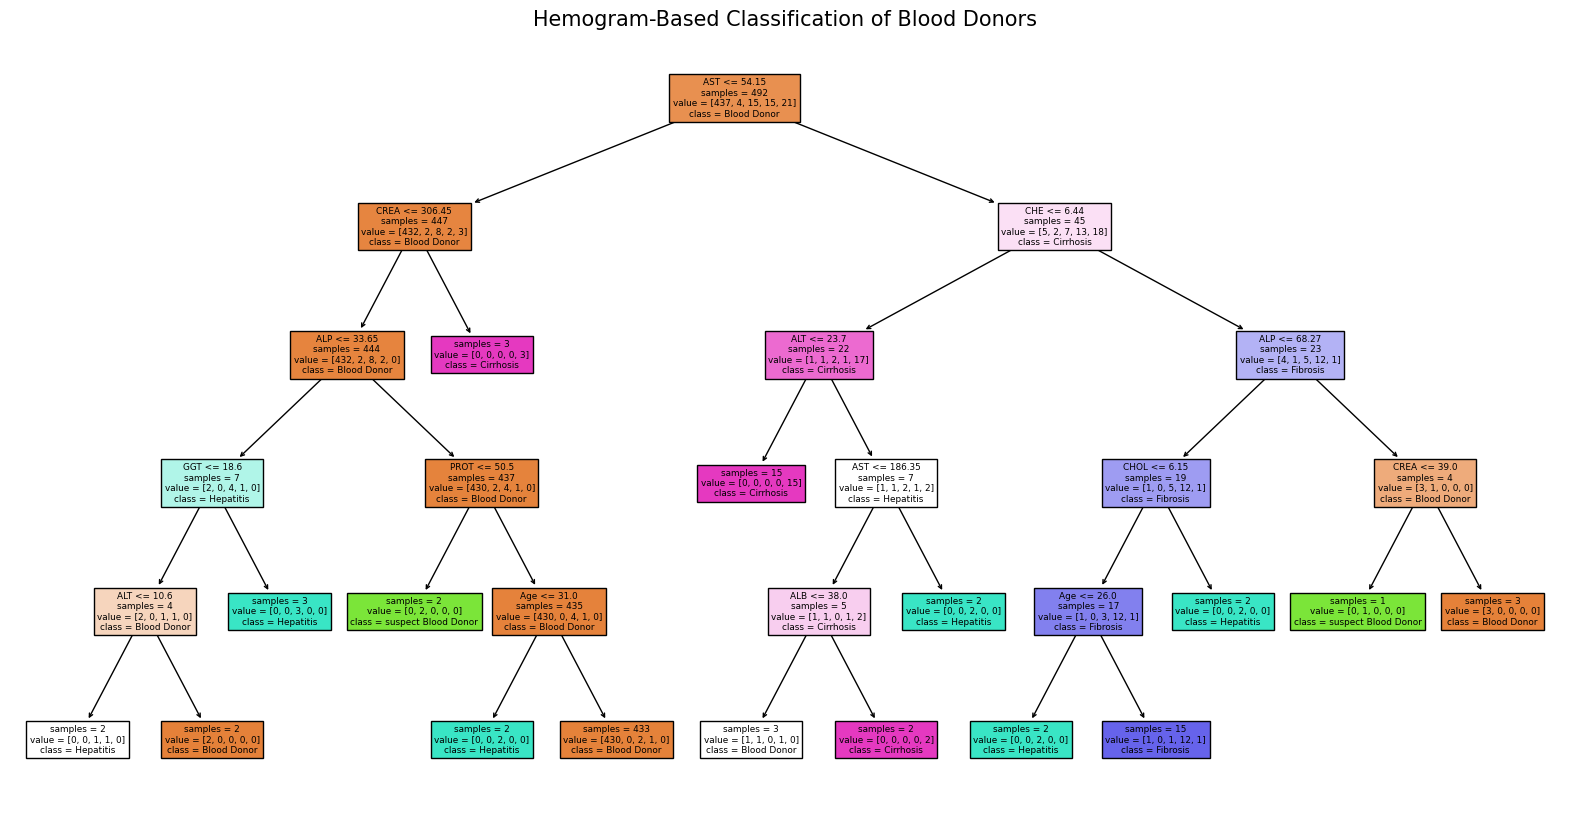

In [44]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, # classifier to plot
          filled=True, # color-code according to classes
          feature_names=list(X.columns), # plotted on top of a box
          class_names=class_names, # plotted at the bottom of a box
          impurity=False, # for easier understanding
          precision=2 # round values
          )

plt.title('Hemogram-Based Classification of Blood Donors', fontsize=15)

plt.show()

In [45]:
# TODO
# - add legend for the abbreviations of the features
# - add hint that left means 'yes'
# - svg?

## 4.4 Decision Path (TODO)

# 5. Anomaly Detection (TODO)

In [49]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

# Assuming your data is in a DataFrame 'X' and target variable in 'y'

# Define columns for imputation
imputation_columns = [...]  # Columns to impute missing values

# Create transformers for imputation
imputer = SimpleImputer(strategy='mean')

# Create a column transformer for imputation
imputation_transformer = ColumnTransformer(
    transformers=[
        ('impute', imputer)
    ])

# Create a pipeline for the decision tree branch
dt_pipeline = make_pipeline(
    ('imputation', imputation_transformer),
    ('decision_tree', DecisionTreeClassifier())
)

# Define columns for scaling, PCA, and isolation forest
scaling_columns = [...]  # Columns to scale

# Create transformers for scaling, PCA, and isolation forest
scaler = RobustScaler()
pca = PCA(n_components=3)  # Adjust the number of components as needed
isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed

# Create a column transformer for scaling, PCA, and isolation forest
scaling_pca_iso_transformer = ColumnTransformer(
    transformers=[
        ('scale', scaler),
        ('pca', pca),
        ('isolate', isolation_forest)
    ])

# Create a pipeline for the robust scaling, PCA, and isolation forest branch
rs_pca_iso_pipeline = make_pipeline(
    ('imputation', imputation_transformer),
    ('scaling_pca_iso', scaling_pca_iso_transformer)
)

# Combine the two branches into a FeatureUnion
full_pipeline = FeatureUnion([
    ('dt_branch', dt_pipeline),
    ('rs_pca_iso_branch', rs_pca_iso_pipeline)
])

# Fit the combined pipeline on your data
full_pipeline.fit(X_train, y_train)

# Make predictions (predictions from both branches)
#predictions = full_pipeline.transform(X_test)

TypeError: All estimators should implement fit and transform. 'Pipeline(steps=[('tuple-1',
                 ('imputation',
                  ColumnTransformer(transformers=[('impute',
                                                   SimpleImputer())]))),
                ('tuple-2', ('decision_tree', DecisionTreeClassifier()))])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't

# 6. Final Model (TODO)

## 6.1 Combine Decision Tree and Anomaly Detection (TODO)